## Final Project Submission

Please fill out: 
* Student name: Celiajoy Omiah
* Student pace: full time
* Scheduled project review date/time: 15/09/2023 
* Instructor name: Samuel Karu
* Blog post URL:


## MICROSOFT MOVIE STUDIO PROJECT

![Alt text](image-1.png)

## Business Problem.
 Microsoft wants to start creating a new movie studio but they don’t know anything about creating movies. In this case, they need to start exploring what types of films are currently doing the best at the box office and translate the findings into actionable insights that the head of Microsoft’s new movie studio can use to help decide what type of films to create.

## Data Understanding.
This project analysed data from two datasets, Box Office Mojo and IMDB. This  provided information regarding genre,genre average raings, runtime and the total gross from production. This will help us conduct the Expoloratory Data Analysis.

1.Importing the libraries  to be used.

In [6]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Loading the necessary datasets

In [7]:
#Reading the data Box Office Mojo
bom = pd.read_csv("./zippedData/bom.movie_gross.csv")
#connecting to the database im.db
conn= sqlite3.connect('./ZippedData/im.db')
cursor = conn.cursor()

In [8]:
#checking for the head of the DataFrame.
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
#checking the shape of the dataset
bom.shape


(3387, 5)

In [10]:
#checking for the info
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


 Generating a summary of  statistics table for the bom DataFrame to include both numeric and non-numeric (categorical) columns. 

In [11]:
bom.describe(include='all')


,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


#Data cleaning the bom dataset.

In [12]:
#checking for duplicates
bom.duplicated().sum()



0

checking for the number of missing (NaN) values in each column of the DataFrame bom and then printing to find the results.This will provide a summary of how many missing values are present in each column of the bom DataFrame.

In [13]:
print(bom.isnull().sum())


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


calculating the percentage of missing values in each column of the DataFrame bom and rounding off the result to four decimal places

In [14]:
null_percentage = bom.isnull().mean().round(4) * 100
null_percentage

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

Univariate analysis

In [46]:
bom.studio.describe()

count     3387
unique     258
top        IFC
freq       166
Name: studio, dtype: object

creating a heatmap visualization of missing (NaN) values in the DataFrame bom using the Seaborn library with the 'viridis' colormap. This visualization will help to gain insights into the dataset's data quality and make informed decisions about how missing data will be handled.

<Axes: >

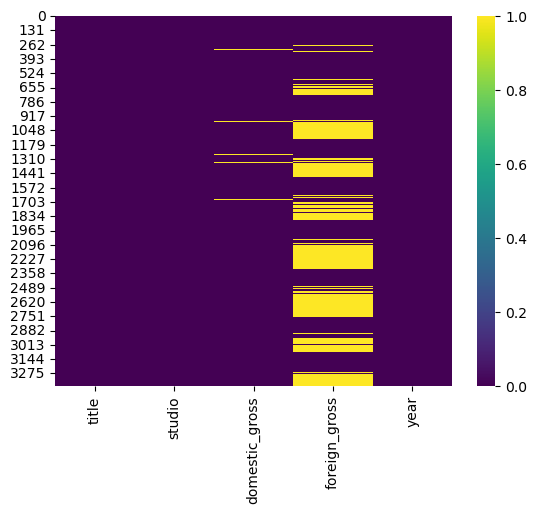

In [15]:
#Heatmap
sns.heatmap(bom.isnull(),cmap='viridis')


In [16]:
#Converting the 'foreign_gross' column to a float to aid in easier to work with the dataset
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

# filling out the missing values in foreign_gross column with zero
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

# adding domestic_gross and foreign_gross columns to create total_gross column
bom['total_gross'] = bom['domestic_gross'] + bom['foreign_gross']

# Filling the missing values in the 'studio' column with a string, such as 'Unknown'
bom['studio'].fillna('Unknown', inplace=True)

# Filling out the missing values in the 'domestic_gross' column with the median of the available values
bom['domestic_gross'].fillna(bom['domestic_gross'].median(), inplace=True)

# Filling out the missing values in the 'total_gross' column with median of the available values
bom['total_gross'].fillna(bom['total_gross'].median(), inplace=True)

# Changing the  total_gross column to a float data type
bom['total_gross'] = pd.to_numeric(bom['total_gross'], errors='coerce')

In [17]:
#checking the first 15 rows of the refined DataFrame bom.
bom.head(15)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [18]:
#checking the last rows of the bom DataFrame
bom.tail(15)

,title,studio,domestic_gross,foreign_gross,year,total_gross
3372,Gabriel and the Mountain,Strand,18400.0,0.0,2018,18400.0
3373,Marlina the Murderer in Four Acts,Icar.,17800.0,0.0,2018,17800.0
3374,The Escape,IFC,14000.0,0.0,2018,14000.0
3375,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.0,0.0,2018,13000.0
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,0.0,2018,12900.0
3377,Let Yourself Go,Men.,12200.0,0.0,2018,12200.0
3378,Hannah (2018),PDF,11700.0,0.0,2018,11700.0
3379,Souvenir,Strand,11400.0,0.0,2018,11400.0
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,0.0,2018,10000.0
3381,Beauty and the Dogs,Osci.,8900.0,0.0,2018,8900.0


showing a visualization representation of the bom DataFrame.

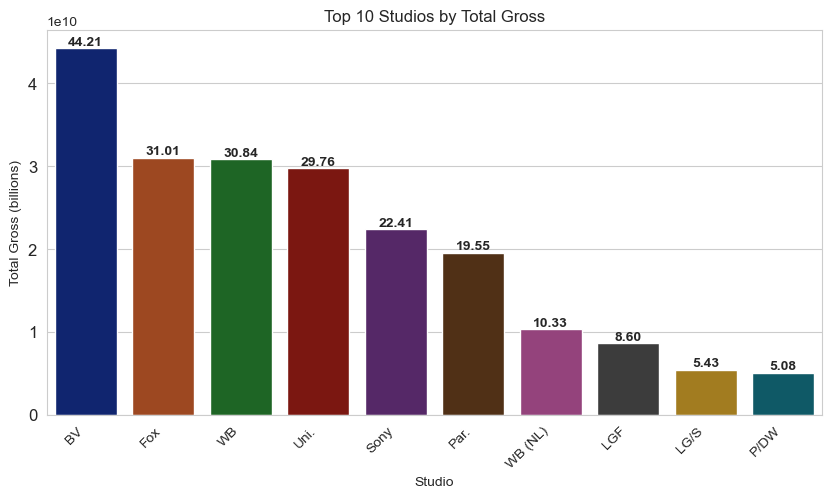

In [19]:
#Group the data and sum the total gross for each studio
studio_gross = bom.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10)

# Create the plot using Seaborn
sns.set_style("whitegrid")
sns.set_palette("dark")
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=studio_gross.index, y=studio_gross.values)

sns.color_palette("tab10")

# Add labels and formatting
ax.set_title('Top 10 Studios by Total Gross')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Gross (billions)')
ax.set_xticklabels(studio_gross.index, rotation=45, ha='right')
ax.tick_params(axis='y', labelsize=12)
for i, v in enumerate(studio_gross.values):
    ax.text(i, v, f"{v/1e9:.2f}", ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

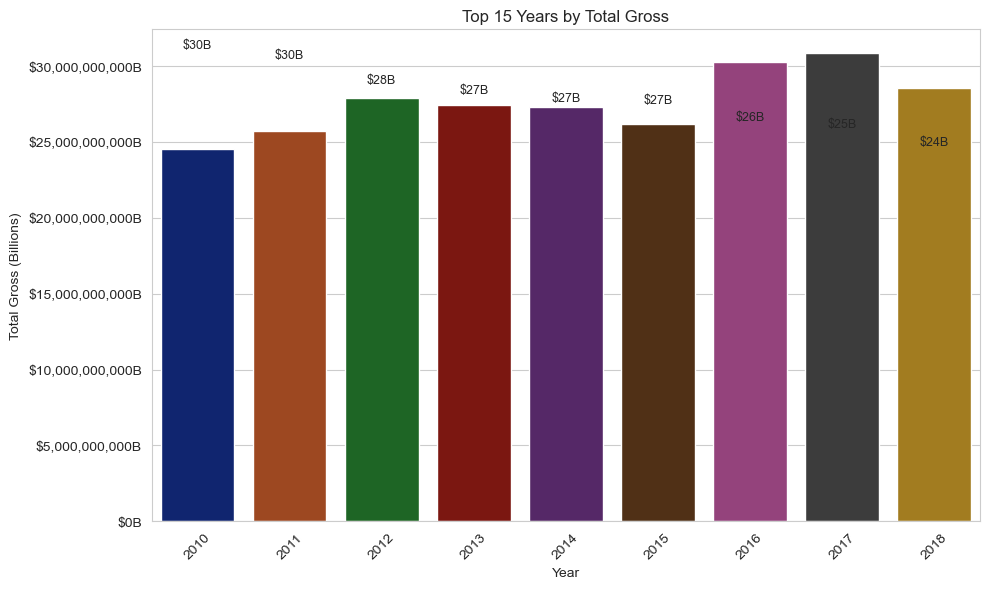

In [20]:

# Grouping the data by year and calculate the total gross for each year
yearly_gross = bom.groupby('year')['total_gross'].sum().reset_index()

# Sorting the values in descending order and select the top 15 years
yearly_gross = yearly_gross.sort_values('total_gross', ascending=False).head(15)

# Creating a barplot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.barplot(x='year', y='total_gross', data=yearly_gross, palette='dark')

# Adding data labels above each bar
for i, v in enumerate(yearly_gross['total_gross']):
    ax.text(i, v + 0.01 * v, f"${int(v/1e9)}B", ha='center', fontsize=9)

# Formatting y-axis ticks as billions
ax.yaxis.set_major_formatter('${x:,.0f}B')

# Setting the title and axis labels
plt.title('Top 15 Years by Total Gross')
plt.xlabel('Year')
plt.ylabel('Total Gross (Billions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


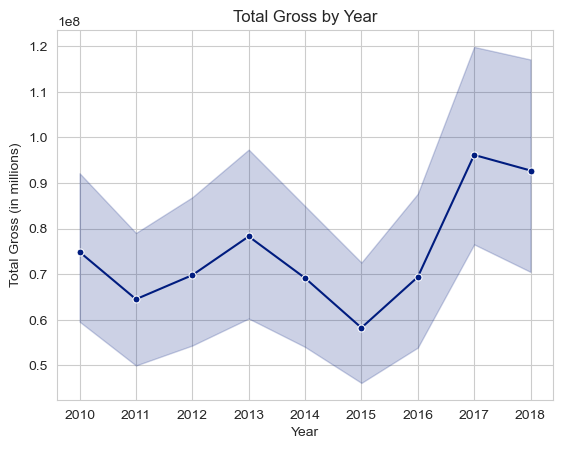

<Figure size 1500x500 with 0 Axes>

In [21]:
# sns.lineplot(x="year", y="total_gross", data=bom)

# Create a lineplot with seaborn
ax = sns.lineplot(x='year', y='total_gross', data=bom, marker='o', markersize=5)

# Format x-axis ticks as integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the title and axis labels
plt.title('Total Gross by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross (in millions)')

# Set the size of the plot
plt.figure(figsize=(15, 5))

# Show the plot
plt.show()

## IMBD Dataset selecting the necessary columns and cleaning the DataFrame.

In [22]:
#Selecting the columns needed from the  movie basics table
m_basics= pd.read_sql(""" SELECT movie_id,
                   original_title,
                   start_year,
                   runtime_minutes,
                   genres 
                   FROM movie_basics;
"""
    ,conn)
m_basics

,movie_id,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,None


checking for any duplicates

In [23]:
m_basics.duplicated().sum()

0

Data cleaning
checking for any null values

In [24]:
m_basics.isnull().sum()

movie_id               0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [25]:
#null percentages
null_percentage = m_basics.isnull().mean().round(4)*100
null_percentage

movie_id            0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64

In [26]:
#dropping the Nan Values in the dataset
m_basics.dropna(inplace=True)
m_basics

,movie_id,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
146134,tt9916160,Drømmeland,2019,72.0,Documentary
146135,tt9916170,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


In [27]:
#checking for the Info in the dataset after cleaning
m_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   original_title   112232 non-null  object 
 2   start_year       112232 non-null  int64  
 3   runtime_minutes  112232 non-null  float64
 4   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [28]:
#checking for the shape after cleaning 
m_basics.shape

(112232, 5)

In [29]:
#checking for entries in each column
m_basics.count()

movie_id           112232
original_title     112232
start_year         112232
runtime_minutes    112232
genres             112232
dtype: int64

In [30]:
m_basics.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


#Selecting the columns needed from the  movie ratings table

In [49]:
m_ratings= pd.read_sql(""" SELECT movie_id,
                   averagerating,
                   numvotes
                   FROM movie_ratings;
"""
    ,conn)
m_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [50]:
#cleaning the data by checking for duplicates
m_ratings.duplicated().sum()

0

In [51]:
#checking for any null values 
m_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Joining the m_basics and the m_ratings table.


In [52]:
#IMDB is the new variable representing the joining of the m_basics and m_rating tables.
#The two tables will be merged using a left join.
IMDB =  pd.merge(m_basics,m_ratings,how='left')
IMDB

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11.0
112228,tt9916170,O Ensaio,2019,51.0,Drama,NaN,NaN
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
112230,tt9916190,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN


In [53]:
#checking for missing values
IMDB.isnull().sum()

movie_id               0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating      46512
numvotes           46512
dtype: int64

In [54]:
#dropping any null values
IMDB.dropna(inplace=True)
IMDB

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
5,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...
112215,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
112216,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5.0
112217,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
112221,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


In [55]:
#checking for table info
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 112227
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   original_title   65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.0+ MB


In [56]:
IMDB.head(10)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
5,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
7,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451.0
8,tt0154039,Oda az igazság,2010,100.0,History,4.6,64.0
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
10,tt0162942,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120.0
11,tt0170651,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6.0


Univariate Analysis

In [59]:
#checking categorical data
IMDB.genres.describe()

count     65720
unique      906
top       Drama
freq      10189
Name: genres, dtype: object

In [61]:
IMDB.original_title.describe()

count     65720
unique    63434
top       Lucky
freq          9
Name: original_title, dtype: object

Measures of Central Tendancy.

In [63]:
#finding mean
print("The average of runtime_minutes is:",IMDB.runtime_minutes.mean())

The average of runtime_minutes is: 94.7322732805843


In [64]:
#finding median
print("The average of runtime_minutes is:",IMDB.runtime_minutes.median()    )

The average of runtime_minutes is: 91.0


In [65]:
#finding mode
print("The average of runtime_minutes is:",IMDB.runtime_minutes.mode())
print("The average of averagerating is:",IMDB.averagerating.mode())

The average of runtime_minutes is: 0    90.0
Name: runtime_minutes, dtype: float64
The average of averagerating is: 0    7.0
Name: averagerating, dtype: float64


In [66]:
#Range of runtime
runtime_max =IMDB['runtime_minutes'].max()
runtime_min =IMDB['runtime_minutes'].min()
runtime_range=runtime_max-runtime_min
print(runtime_min ,runtime_min)
print(runtime_range)

3.0 3.0
51417.0


descriptive statistics of the IMDB DataFrame 

In [39]:
IMDB.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


Finding out the type of movies people like have high ratings.

In [40]:
high_rating = IMDB.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)
high_rating

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
Game-Show                      9.0
Drama,Short                    8.8
Documentary,News,Sport         8.8
Documentary,News,Reality-TV    8.8
Action,Adventure,Musical       8.7
Biography,History,Music        8.5
Adventure,Crime                8.5
Mystery,News,Thriller          8.4
Name: averagerating, dtype: float64

Data Visualization of high ratings on  bar plot


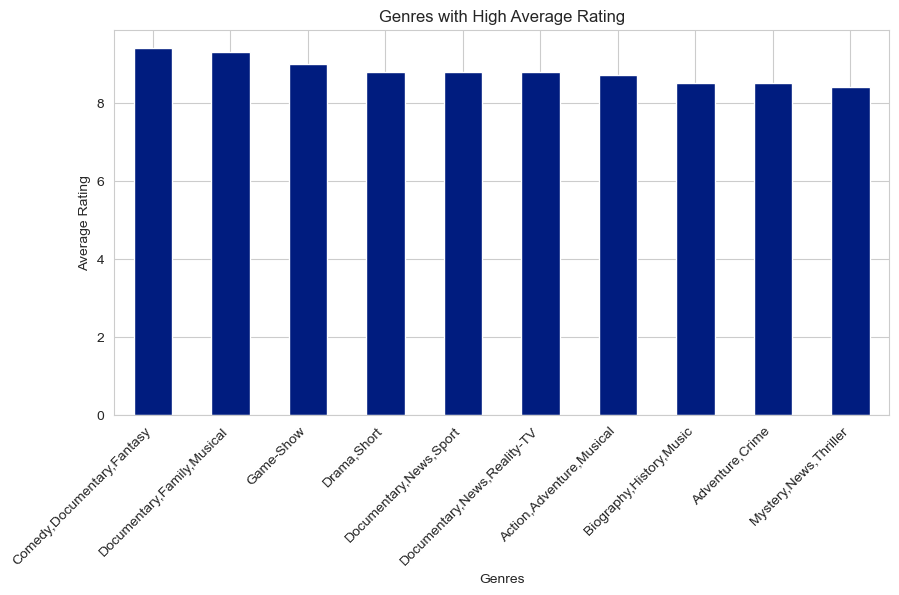

In [41]:
 #Create a bar plot
plt.figure(figsize=(10, 5))  # Set the figure size
high_rating.plot(kind='bar')

# Set the title and axis labels
plt.title('Genres with High Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='averagerating', ylabel='Count'>

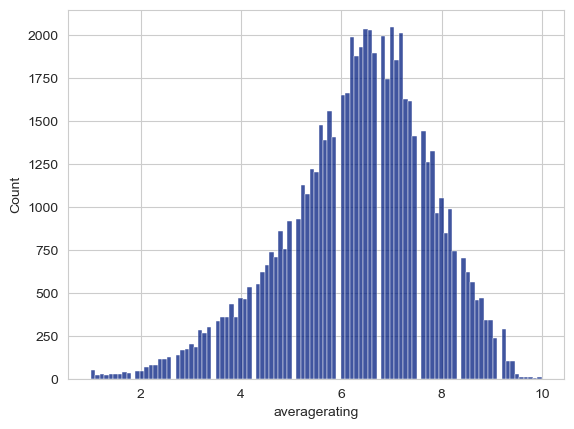

In [42]:
sns.histplot(x="averagerating", data=IMDB)


In [43]:
run_time =IMDB.groupby('genres')['runtime_minutes'].mean().sort_values(ascending=False).head(10)
run_time

genres
History,Musical,Romance      174.000000
Drama,Fantasy,Musical        171.444444
Action,Musical,Romance       170.000000
Action,Music                 168.000000
Comedy,History               167.666667
Musical,Romance,Thriller     165.000000
Adventure,Animation,Crime    157.000000
Reality-TV                   155.000000
Adventure,Horror,Romance     145.000000
Action,Family,Thriller       145.000000
Name: runtime_minutes, dtype: float64

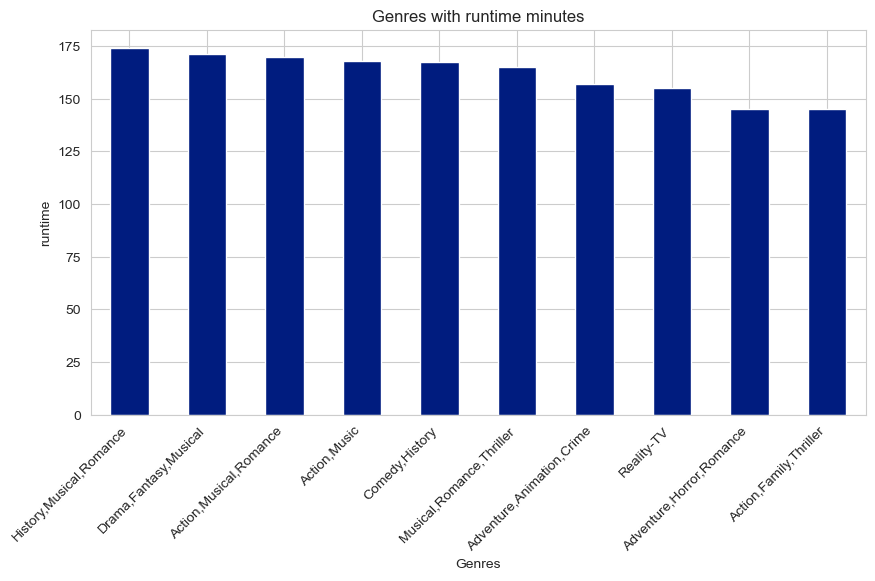

In [44]:
plt.figure(figsize=(10, 5))  # Set the figure size
run_time.plot(kind='bar')

# Set the title and axis labels
plt.title('Genres with runtime minutes')
plt.xlabel('Genres')
plt.ylabel('runtime')
plt.xticks(rotation=45, ha='right')
plt.show()

Bivariate Analysis.

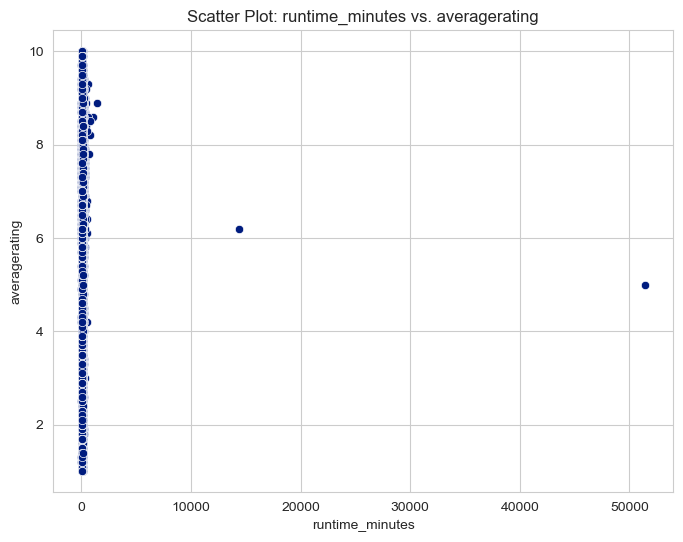

In [67]:
#Shows relationship between 2 variables.
# Scatter plot for runtime_minutes vs. averagerating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=IMDB, x='runtime_minutes', y='averagerating')
plt.xlabel('runtime_minutes')
plt.ylabel('averagerating')
plt.title('Scatter Plot: runtime_minutes vs. averagerating')
plt.show()

There is no linear relationship between the movie runtime_minutes and the averagerating of the movies.

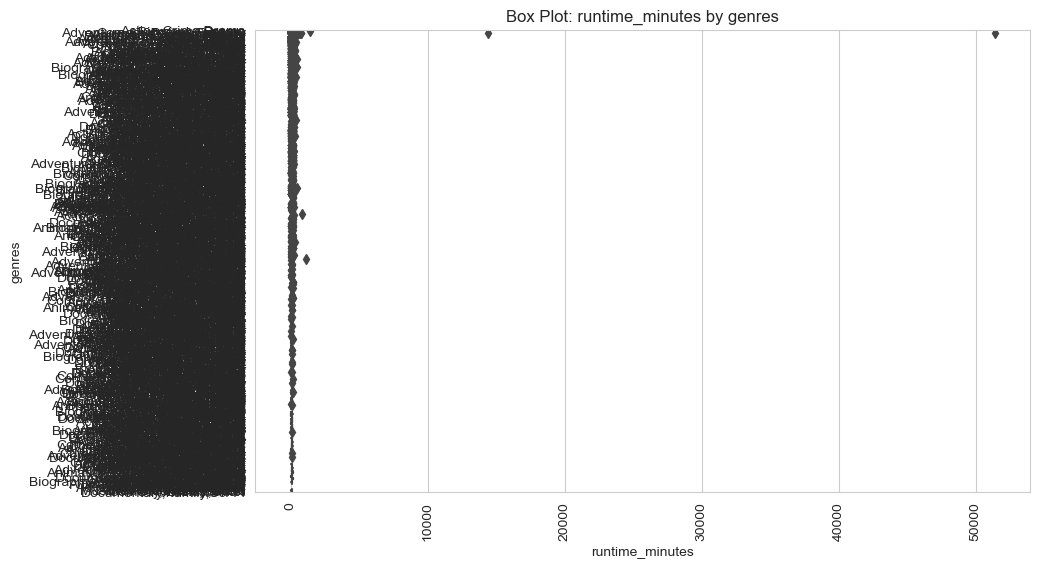

In [68]:
# Box plot for runtime_minutes by genres
plt.figure(figsize=(10, 6))
sns.boxplot(data=IMDB, x='runtime_minutes', y='genres')
plt.xlabel('runtime_minutes')
plt.ylabel('genres')
plt.title('Box Plot: runtime_minutes by genres')
plt.xticks(rotation=90)
plt.show()

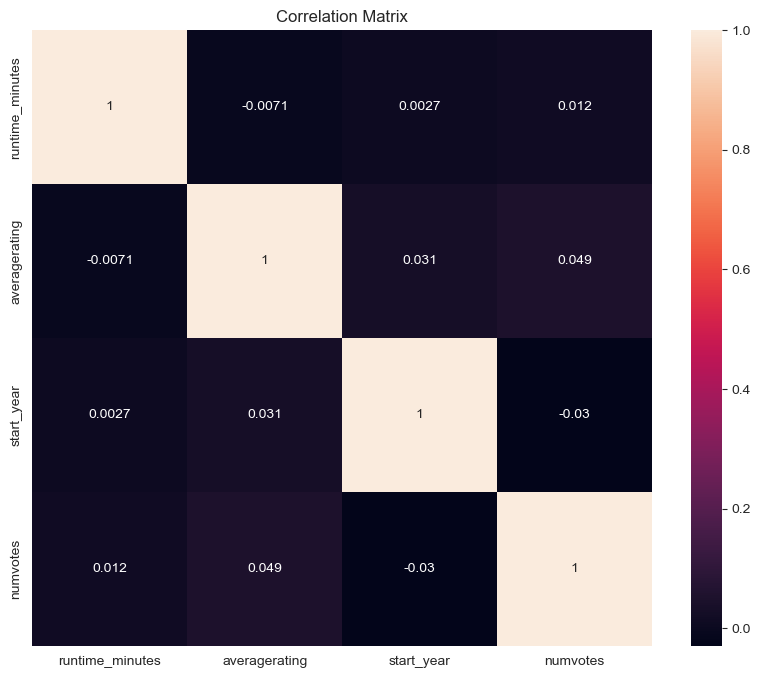

In [71]:
2. ## Correlation matrix
# Select the numerical variables for which you want to calculate the correlation matrix
numerical_vars = IMDB[['runtime_minutes',  'averagerating', 'start_year','numvotes']]

#Calculate the correlation matrix using the corr() method
correlation_matrix = numerical_vars.corr()

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


There is a negative relationship between the runtime_minutes and average rating. when the runtime_minutes increases the averagerating decreases.

# Multivariate Analysis

In [72]:
# Step 1: Descriptive Statistics
# Compute basic statistics for numerical variables
numerical_stats = IMDB[['runtime_minutes', 'averagerating', 'start_year','numvotes']].describe()
print(numerical_stats)

       runtime_minutes  averagerating    start_year      numvotes
count     65720.000000   65720.000000  65720.000000  6.572000e+04
mean         94.732273       6.320902   2014.258065  3.954674e+03
std         209.377017       1.458878      2.600143  3.208823e+04
min           3.000000       1.000000   2010.000000  5.000000e+00
25%          81.000000       5.500000   2012.000000  1.600000e+01
50%          91.000000       6.500000   2014.000000  6.200000e+01
75%         104.000000       7.300000   2016.000000  3.520000e+02
max       51420.000000      10.000000   2019.000000  1.841066e+06


Since there is only linear relation between two variables( runtime_minutes and averagerating) then there is no need for us to do any dimensionality reduction that is the PCA/LDA.

## Conclusion.
There are some common conclusions that can be made:
The quality of the DataFrame has been improved by addressing missing values, duplicates, and inconsistencies. The dataset is now more reliable for further analysis.
The percentage of missing values has been assessed for each column with missing data and has been dealt with by dropping them.
Data types have been reviewed and adjusted as needed. 
Descriptive statistics have been calculated to summarize key attributes of the dataset. Measures of central tendency (mean, median, mode) and dispersion (range, standard deviation) have been computed.


##  Recommendation
Given all the information we gathered and visualized, the recommendations we have are:

1.Microsoft should focus on Comedy,Documentary,Fantasy and Family genres. These genres have very high rating acording to average ratings by the viewers.

2.Microsoft should consider benchmarking with the studios that have performed well by their total gross from venturing into movie production. some of the top studio are BV,FOX and WP. This will give them more insights on the best movies produced by this studios and help them venture into creating those genres.

3.Microsoft should also consider the runtime minutes when entering the video content creation. This is because some of the genres with long runtime may affect their ratings because there are viewers with different preferences when it come to timing. 